In [32]:
## data preparation and random forest model training + prediction

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_json ('./partial_df.json')
df

,author,awards,created_utc,text_from_image,words,processed_words,downs,id,is_nsfw,media,...,avg_blueRGB,avg_tan,avg_orange,vgg_general,vgg_feature_1,vgg1_prob,vgg_feature_2,vgg2_prob,vgg_feature_3,vgg3_prob
1,L71U,[],1584295514,NICE DICK\r\n,Ricardo😎NICE DICK\r\n,"[ricardo, nice, dick]",0,fj5ixk,False,https://i.redd.it/w6acm47gmvm41.jpg,...,93.377158,2.784004,0.331221,"[[[n07248320, book_jacket, 0.5454370379], [n02...",book_jacket,0.545437,balance_beam,0.242594,parallel_bars,0.029977
2,Awesome-ness5,[],1584294841,Nvidia's calling on gaming PC owners to\r\nput...,Gamers AssembleNvidia's calling on gaming PC o...,"[gamer, assemblenvidia, call, game, owner, sys...",0,fj5bzj,False,https://i.redd.it/bqawbb5gkvm41.jpg,...,31.829427,3.555040,6.742880,"[[[n07248320, book_jacket, 0.4862611592], [n06...",book_jacket,0.486261,web_site,0.466624,comic_book,0.009492
7,notaspop,[],1584293653,When you post a low-effort meme\r\nfor fun to ...,I mean.... Not Corona time?When you post a low...,"[mean, corona, time, post, effort, meme, peopl...",0,fj50df,False,https://i.redd.it/v5pea6wwgvm41.jpg,...,163.097218,0.136924,0.000000,"[[[n03832673, notebook, 0.1871554404], [n06359...",notebook,0.187155,web_site,0.172692,computer_keyboard,0.164374
9,In_An_Elmo_Cult,[],1584293448,All of the internet:\r\nHe •I've seen this one...,.All of the internet:\r\nHe •I've seen this on...,"[internet, see, internet, explor, whatdo, mean...",0,fj4ycc,False,https://i.redd.it/hakptfr2gvm41.png,...,221.692281,6.094527,12.068732,"[[[n06359193, web_site, 0.9597747326], [n07248...",web_site,0.959775,book_jacket,0.007812,comic_book,0.003456
15,brutalsam,[],1584292201,Humans: we should prevent this virus from spre...,one day humans will be the reason of their ext...,"[human, reason, prevent, virus, spread, human,...",0,fj4m0x,False,https://i.redd.it/4apsvkjgcvm41.jpg,...,107.692454,48.280000,0.073221,"[[[n03814906, necklace, 0.30186796190000004], ...",necklace,0.301868,bib,0.219083,sunglasses,0.098275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10811,DouweNijssen,[],1584270090,Nederland will no longer watcfrfrom the shadow...,When the schools in the Netherlands finally gi...,"[school, netherland, final, innederland, longe...",0,fizpc9,False,https://i.redd.it/jvppqlpuitm41.jpg,...,74.559576,12.883404,0.000000,"[[[n03045698, cloak, 0.31521052120000004], [n0...",cloak,0.315211,academic_gown,0.241709,abaya,0.102845
10812,Fat_Pige0ns,[],1584270088,North Korea Corona virus live\r\nupdate:\r\n8:...,Shooty shootyNorth Korea Corona virus live\r\n...,"[shooti, shootynorth, korea, corona, virus, li...",0,fizpbv,False,https://i.redd.it/r6xes0cuitm41.jpg,...,91.827067,3.370567,0.045440,"[[[n06359193, web_site, 0.3519813418], [n07248...",web_site,0.351981,book_jacket,0.319875,comic_book,0.049667
10813,Lack39,[],1584270087,Me waiting for mv pee to\r\nfinish after I hol...,Finish alreadyMe waiting for mv pee to\r\nfini...,"[finish, alreadym, wait, finish, hold, long, t...",0,fizpbs,False,https://i.redd.it/gdsm9ufuitm41.jpg,...,154.111632,22.741981,0.000000,"[[[n03179701, desk, 0.17057618500000002], [n04...",desk,0.170576,teddy,0.101930,toyshop,0.058293
10822,D0nnerkeil,[],1584269983,Friend: Cats aren't that cool\r\n,No corona hereFriend: Cats aren't that cool\r\n,"[corona, herefriend, cat, aren, cool]",0,fizop8,False,https://i.redd.it/cdm8r1ajitm41.jpg,...,50.587151,0.000000,0.000000,"[[[n03291819, envelope, 0.0665244162], [n04235...",envelope,0.066524,sleeping_bag,0.060347,stethoscope,0.047893


In [3]:
# common labels from vgg - image content, to combine, found by searching most common words with functions in next cell
animals = ['animals','Chihuahua', 'Sussex_spaniel','Scotch_terrier','white_wolf','teddy','Pomeranian','pug','Pekinese',
          'golden_retriever','grey_whale','platypus','Great_Dane','borzoi','toy_terrier','Egyptian_cat','jellyfish',
          'Siamese_cat','Persian_cat','Indian_cobra','tiger_cat','eel','brown_bear','wire-haired_fox_terrier',
          'Bouvier_des_Flandres','proboscis_monkey','goose','cabbage_butterfly','tailed_frog','American_egret',
          'goose','sea_snake','tiger','ice_bear','goldfish','Lakeland_terrier','weasel',
          'Labrador_retriever','tabby','house_finch','grey_fox','Siberian_husky','leafhopper','traffic_light',
          'Boston_bull','king_penguin','beaver','Samoyed','Saint_Bernard','Arabian_camel','ibex','guinea_pig',
          'Kerry_blue_terrier','badger','bloodhound']

formatted = ['formatted','book_jacket', 'comic_book', 'web_site', 'scoreboard', 'menu', 'notebook','jigsaw_puzzle',
            'crossword_puzzle']

tech = ['tech','hand-held_computer','computer_keyboard','remote_control','iPod','joystick','microphone','television',
       'printer','refrigerator','cellular_telephone','laptop','oscilloscope','CD_player','stethoscope',
       'desktop_computer','analog_clock','screen','projector','tape_player','soap_dispenser','sewing_machine',
       'photocopier','vending_machine','Polaroid_camera']

sports = ['sports','basketball', 'golf_ball','ping-pong_ball','unicycle','racket','volleyball','ski','tricycle',
          'ballplayer']

violent = ['violent','bulletproof_vest','revolver','assault_rifle','rifle','power_drill']

vehicle = ['vehicle','airship','garbage_truck','golfcart', 'tractor','forklift'] 

mask = ['mask','ski_mask','oxygen_mask','gasmask'] 

uniforms = ['uniforms','suit','academic_gown','jersey','lab_coat']

In [4]:
## the following functions can be used to sort the categorical attributes (vgg identified image content and processed
## words from imaged)

# function counts occurrences of certain words in feature (to identify the most common)
def getCategoryCounts(all_features):
    common_categories = []; counts = []
    for f1 in all_features:
        for row in f1:
            if (common_categories.count(row) == 0):
                common_categories.append(row); counts.append(1)
            else:
                counts[common_categories.index(row)] += 1
    return common_categories, counts

# returns the most common categories
def commonCategoriesPlotObj(common_categories, counts):
    counts_to_plot = [max(counts)]; categories_to_plot = [common_categories[counts.index(max(counts))]]
    for i in range(0,60):
        # eliminate the maximum count from the list
        counts = list(filter((max(counts)).__ne__, counts))
        common_categories = list(filter((common_categories[counts.index(max(counts))]).__ne__, common_categories))
        # if it is not already stored, store the next maximum in the plot lists
        if (categories_to_plot.count(common_categories[counts.index(max(counts))]) == 0):
               counts_to_plot.append(max(counts)); categories_to_plot.append(common_categories[counts.index(max(counts))])
    return counts_to_plot, categories_to_plot

# function combines features (parameter) with the categories found
def combineTerms(feature,list_):
    f = list(feature) 
    for i in range(0,len(list_)):
        consider = list_[i]
        for j in range(0,len(consider)):
            while (f.count(consider[j]) > 0):
                f[f.index(consider[j])] = consider[0]
    return f

# test functions / get vars for the vgg identified image content
list_ = [animals,uniforms,vehicle,formatted,sports,violent,tech]
f1 = combineTerms(df['vgg_feature_1'],list_); f2 = combineTerms(df['vgg_feature_2'],list_); f3 = combineTerms(df['vgg_feature_3'],list_)
common_categories, counts = getCategoryCounts([f1,f2,f3])
counts_to_plot, categories_to_plot = commonCategoriesPlotObj(common_categories,counts)

In [5]:
# one-hot encode it
def oneHotEncode(f1, categories_to_plot):
    hot_encoded = []
    for i in range(0,len(f1)):
        hot_encoded.append([0,0,0,0,0,0,0,0])
        for j in range(0,len(categories_to_plot[0:8])):
            if (f1[i] == categories_to_plot[j]) or (f2[i] == categories_to_plot[j]) or (f3[i] == categories_to_plot[j]):
                hot_encoded[i][j] = 1 
                # note: binary 0/1 could be replaced with the vgg probability
    return hot_encoded

# check and store
hot_encoded = oneHotEncode(f1,categories_to_plot)
for j in range(0,len(categories_to_plot[0:8])):
    df[categories_to_plot[j]] = [row[j] for row in hot_encoded]
df.head()

,author,awards,created_utc,text_from_image,words,processed_words,downs,id,is_nsfw,media,...,vgg_feature_3,vgg3_prob,formatted,tech,envelope,animals,uniforms,monitor,sports,violent
1,L71U,[],1584295514,NICE DICK\r\n,Ricardo😎NICE DICK\r\n,"[ricardo, nice, dick]",0,fj5ixk,False,https://i.redd.it/w6acm47gmvm41.jpg,...,parallel_bars,0.029977,1,0,0,0,0,0,0,0
2,Awesome-ness5,[],1584294841,Nvidia's calling on gaming PC owners to\r\nput...,Gamers AssembleNvidia's calling on gaming PC o...,"[gamer, assemblenvidia, call, game, owner, sys...",0,fj5bzj,False,https://i.redd.it/bqawbb5gkvm41.jpg,...,comic_book,0.009492,1,0,0,0,0,0,0,0
7,notaspop,[],1584293653,When you post a low-effort meme\r\nfor fun to ...,I mean.... Not Corona time?When you post a low...,"[mean, corona, time, post, effort, meme, peopl...",0,fj50df,False,https://i.redd.it/v5pea6wwgvm41.jpg,...,computer_keyboard,0.164374,1,1,0,0,0,0,0,0
9,In_An_Elmo_Cult,[],1584293448,All of the internet:\r\nHe •I've seen this one...,.All of the internet:\r\nHe •I've seen this on...,"[internet, see, internet, explor, whatdo, mean...",0,fj4ycc,False,https://i.redd.it/hakptfr2gvm41.png,...,comic_book,0.003456,1,0,0,0,0,0,0,0
15,brutalsam,[],1584292201,Humans: we should prevent this virus from spre...,one day humans will be the reason of their ext...,"[human, reason, prevent, virus, spread, human,...",0,fj4m0x,False,https://i.redd.it/4apsvkjgcvm41.jpg,...,sunglasses,0.098275,0,0,0,0,0,0,0,0


In [19]:
# do the same for processed words column 

list_ = [['coronavirus','corona','virus','corvid','sar','virustctu','spread'],
         ['self-reference','comment','meme','like','people','internet','post','repost','reddit'],
         ['fuck','fight','kill'],
         ['good','forgiv','good','creator','church'],
         ['politic','world','congress']]
f = combineTerms(df['processed_words'],list_)
common_categories1, counts1 = getCategoryCounts(f)
counts_to_plot1, categories_to_plot1 = commonCategoriesPlotObj(common_categories1,counts1)

# one-hot encode it
hot_encoded1 = []
for i in range(0,len(f)):
    hot_encoded1.append([0,0,0,0,0,0,0,0])
    for j in range(0,len(categories_to_plot1[0:8])):
        for word in f[i]:
            if (word == categories_to_plot1[j]):
                hot_encoded1[i][j] = 1 
#check
for j in range(0,len(categories_to_plot1[0:8])):
    df[categories_to_plot1[j]] = [row[j] for row in hot_encoded1]
df.columns

Index(['author', 'awards', 'created_utc', 'text_from_image', 'words',
       'processed_words', 'downs', 'id', 'is_nsfw', 'media', 'subreddit',
       'subscribers', 'thumbnail.height', 'thumbnail.thumbnail',
       'thumbnail.width', 'title', 'ups', 'url', 'avg_hue', 'avg_saturation',
       'avg_value', 'avg_redRGB', 'avg_greenRGB', 'avg_blueRGB', 'avg_tan',
       'avg_orange', 'vgg_general', 'vgg_feature_1', 'vgg1_prob',
       'vgg_feature_2', 'vgg2_prob', 'vgg_feature_3', 'vgg3_prob', 'formatted',
       'tech', 'envelope', 'animals', 'uniforms', 'monitor', 'sports',
       'violent', 'meme', 'coronavirus', 'like', 'peopl', 'time', 'toilet',
       'paper', 'virus', 'dankorNot'],
      dtype='object')

In [15]:
## format labels into "dank or not" binary for randomForest classification task
import numpy as np

labels_reg = np.array(df['ups']); labels = []
for val in labels_reg:
    if val >= np.percentile(df['ups'], 90):
        labels.append(1)
    else:
        labels.append(0)
        
labels=np.array(labels)
df['dankorNot'] = labels

df_sorted = df.sort_values(by='ups',axis=0,ascending=False)
not_dank = df_sorted[sum(labels):len(labels)].sample(n=2*sum(labels),axis=0)
data = not_dank.append(df_sorted[0:sum(labels)])
data.shape

labels = np.array(data['dankorNot'])

In [22]:
# all-numerical features-set, excludes labels
features = data[['created_utc','tech', 'envelope', 'monitor','uniforms','animals', 'formatted']].copy()
features['violent'] = data['violent']; features['tech'] = data['tech']; features['subscribers'] = data['subscribers']; features['avg_hue'] = data['avg_hue']
features['avg_saturation'] = data['avg_saturation']; features['avg_value'] = data['avg_value']; features['avg_redRGB'] = data['avg_redRGB']
features['avg_blueRGB'] = data['avg_blueRGB']; features['avg_greenRGB'] = data['avg_greenRGB']; features['avg_tan'] = data['avg_tan']
features['avg_orange'] = data['avg_orange']; features[ 'vgg1_prob'] = data['vgg1_prob']; features[ 'virus'] = data['virus']; features[ 'coronavirus'] = data['coronavirus']
features[ 'meme'] = data['meme']; features[ 'like'] = data['like']; features[ 'peopl'] = data['peopl']; features[ 'time'] = data['time']; features['toilet'] = data['toilet']

# Saving feature names for later use # Convert to numpy array
feature_list = list(features.columns)
#features = features.sample(n=sum(labels),axis=0)
features = np.array(features)
features.shape

(1683, 25)

In [23]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [24]:
# scale the features, helpful for some color attributes
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_features = sc.fit_transform(train_features)
test_features = sc.transform(test_features)

In [25]:
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 500, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=500,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [26]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)# Calculate the absolute errors
errors = abs(predictions - test_labels)# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

#import matplotlib.pyplot as plt

#dank_binary_task_accuracy = []
#for i in range(0,len(predictions)):
#    if (test_labels[i] > 500) and (predictions[i] > 500):
#        dank_binary_task_accuracy.append(1)
#    elif (test_labels[i] < 500) and (predictions[i] < 500):
#        dank_binary_task_accuracy.append(1)
#    else:
#        dank_binary_task_accuracy.append(0)
        
#print(sum(dank_binary_task_accuracy)/len(dank_binary_task_accuracy))

#plt.plot(np.linspace(1,len(predictions),len(predictions)),predictions,color='blue')
#plt.plot(np.linspace(1,len(predictions),len(predictions)),test_labels,color='red')
#plt.show()

Mean Absolute Error: 0.42 degrees.


In [27]:
# Calculate mean absolute percentage error (MAPE)
good = 0; bad = 0
for i in range(0,len(predictions)):
    if (predictions[i]>0.5) and (test_labels[i]==1):
        good += 1
    elif (predictions[i]<0.5) and (test_labels[i]==0):
        good += 1
    else:
        bad +=1
good/(good+bad)

0.6437054631828979

Text(0, 0.5, 'Importance')

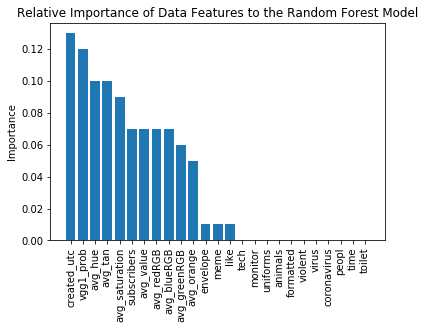

In [35]:
# tree visualization code
from sklearn.tree import export_graphviz
tree = rf.estimators_[5]
from sklearn.tree import export_graphviz
tree = rf.estimators_[5]
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)

# Get numerical feature importances
importances = list(rf.feature_importances_) # List of tuples, variable - importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)] # sort features by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# display feature importance on plot
x = []; y = []
for i in range(0, len(feature_importances)):
    x.append(feature_importances[i][0])
    y.append(feature_importances[i][1])
    
plt.bar(np.linspace(1,len(x),len(x)),y)
_ = plt.xticks(np.linspace(1,len(x),len(x)),labels=x,rotation=90)
plt.title('Relative Importance of Data Features to the Random Forest Model')
plt.ylabel('Importance')

In [ ]:
sources:
https://towardsdatascience.com/random-forest-in-python-24d0893d51c0